# The Workshop

All ideas to be tested out here.

#### Imports & Preparing our Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from skimage import io, data
from skimage.io import imread
from PIL import Image

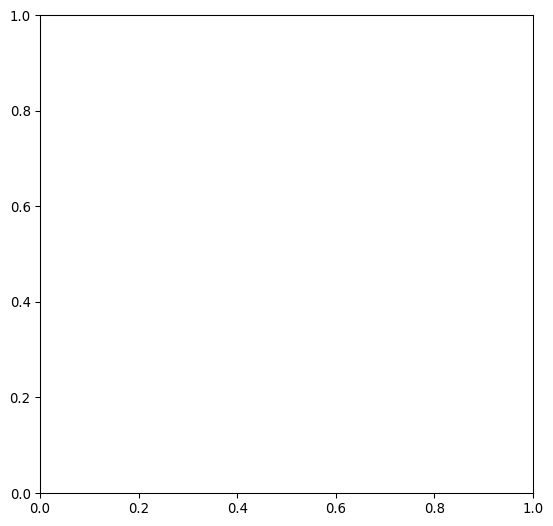

In [2]:
# Open our image
mouse = imread('mouse2.PNG', as_gray=True)
mouseImg = Image.open('mouse2.PNG')

# Fetch dpi
if(mouseImg.info.get('dpi')):
    x_dpi, y_dpi = mouseImg.info['dpi']
img_dpi = (x_dpi + y_dpi) / 2

# Set up figure
fig = plt.figure(figsize=(float(mouseImg.size[0])/img_dpi, float(mouseImg.size[1])/img_dpi), dpi=img_dpi)
ax = fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

#### Grid
Skip this code block for gridless structure.

In [5]:
# Set the gridding interval
interval_frameShape = mouse.shape
print(interval_frameShape)
interval_cellSize = interval_frameShape / np.sqrt(128) # The number in np.sqrt() is the number of cells
print(interval_cellSize)
mouse_xInterval = interval_cellSize[0]
mouse_yInterval = interval_cellSize[1]
xloc = plticker.MultipleLocator(base=mouse_xInterval)
yloc = plticker.MultipleLocator(base=mouse_yInterval)
ax.xaxis.set_major_locator(xloc)
ax.yaxis.set_major_locator(yloc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

(478, 493)
[42.24963018 43.57545539]


#### Show the image

In [3]:
# Add the image in grayscale
ax.imshow(mouse, cmap=plt.cm.Greys_r)

#### Label cells with numbers
Labeling must come after showing the image or the labels will not appear. Skip this code block for gridless structure.

In [18]:
# To additionally label each cell with a number
# Find number of gridsquares in x and y direction
nx = abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(mouse_xInterval)))
ny = abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(mouse_yInterval)))

# Add labels
for i in range(ny):
    y = mouse_yInterval / 2 + i * mouse_yInterval
    for j in range(nx):
        x = mouse_xInterval / 2. + float(j) * mouse_xInterval
        ax.text(x, y, '{:d}'.format(i+j*nx), color='r', ha='center', va='center')

#### Save Image

In [4]:
# Save file
fig.savefig('gridline_mouse.png', dpi=img_dpi)

This first image is used as a live preview for the user; it is so they can determine which _key cells_ they want to select. The program, when running through each frame, won't create gridlines like this, or label them, but it _will_ know the location of cells.

#### Show low-res plot in this Notebook
Run the code in the next block to show the preview or just check the file directory for the full-res version.
To see a segmentation-ready version, just avoid running the code blocks for the grid and the number overlay. This will produce just the normalized, B/W image.

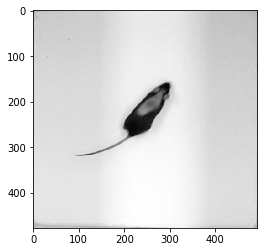

In [5]:
plt.imshow(imread("gridline_mouse.png"))

### Implementing Otsu's Method (Two-Color Segmentation)
For two-color segmentation on gridline-structured frames.

In [28]:
#code

### Implementing Otsu's Method (Three-Color Segmentation)
For three-color segmentation on blob-based structure frames.

In [29]:
#code

### Taking a Video in as Input and Creating Raw Frames
Explanation of Python library, methods, code, &c.

In [13]:
# Function to extract frames (src: https://www.geeksforgeeks.org/python-program-extract-frames-using-opencv/)
def frameCapture(fc_path):
    fc_vidObj = cv2.VideoCapture(fc_path) # Path to video file
    fc_count = 0                          # Used as counter variable
    fc_success = 1                        # Checks if the frames were extracted
    
    while fc_success:
        # vidObj object calls read
        fc_success, fc_image = fc_vidObj.read()
        cv2.imwrite("frame%d.jpg" % fc_count, fc_image) # Saves the frames
        fc_count += 1

In [14]:
# Testing on a mouse video
frameCapture("C:\\Users\\ahack\\Documents\\QC Lab Docs\\David Mouse Project\\1-8-20\\REC_0001.MP4")

KeyboardInterrupt: 